This is designed to run on FL images only - essentially for each type of FL image, we can replace these by a single image. By my calculation this would yield a savings with the new sequence of 2GB precompression, and 1GB savings, but I'll be curious to see what you find!
 
BTW, here is the key function in that notebook, just in case you have trouble finding it:
 
def create_hdr(images: list[np.ndarray], exposure_times: list[float]) -> np.ndarray:
    """
    Create an HDR image from a list of images and corresponding exposure times.
 
    Args:
        images (list[np.ndarray]): List of image arrays (H x W x 3), dtype=np.uint8.
        exposure_times (list[float]): List of exposure times in seconds.
 
    Returns:
        np.ndarray: HDR image as a 32-bit float NumPy array.
    """
    if len(images) != len(exposure_times):
        raise ValueError("Number of images and exposure times must match.")
 
    # Convert exposure times to float32
    times = np.array(exposure_times, dtype=np.float32)
 
    # Align images if needed (optional but recommended)
    #alignMTB = cv2.createAlignMTB()
    #alignMTB.process(images, images)
 
    # Estimate camera response function (CRF)
    calibrate = cv2.createCalibrateDebevec()
    response_debevec = calibrate.process(images, times)
 
    # Merge into HDR
    merge_debevec = cv2.createMergeDebevec()
    hdr = merge_debevec.process(images, times, response_debevec)
 
    return hd

In [15]:
!pip install opencv-python opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 12.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 MB 12.0 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [33]:
from PIL import Image
import pandas as pd
import json
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
with open("tests/integration/test_data/run_images/F5623A25-5AC3-4786-8E2C-402CBE0D5764/run_images.json") as f:
    docs = json.load(f)

In [23]:
parent = Path("tests/integration/test_data/run_images/F5623A25-5AC3-4786-8E2C-402CBE0D5764")

In [5]:
docs

[{'definitive_run_id': 'F5623A25-5AC3-4786-8E2C-402CBE0D5764',
  'field_id': 'left_100_um_1_1',
  'field_xi': 1,
  'field_yi': 1,
  'image_z': 0,
  'chamber': 'left_100_um',
  'fl_blue_2': None,
  'bf_green_off': None,
  'fl_uv_5': None,
  'fl_uv_large_object': None,
  'fl_blue_x5': 'left_100_um_1_1_003_flbluX5_2.00_0.00.png',
  'bf_violet': 'left_100_um_1_1_002_bfvio_1.00_0.00.png',
  'fl_blue_x10': 'left_100_um_1_1_005_flbluX10_1.00_0.00.png',
  'bf_violet_off': None,
  'fl_blue': None,
  'fl_uv_2': None,
  'fl_uv_x2': None,
  'fl_blue_x2': None,
  'fl_uv_x10': 'left_100_um_1_1_004_fluvX10_1.00_0.00.png',
  'fl_blue_x6': None,
  'fl_blue_x4': None,
  'bf_green': 'left_100_um_1_1_001_bfgrn_1.00_0.00.png',
  'fl_blue_x2_large_object': None,
  'fl_uv': None,
  'bf_violet_large_object': None},
 {'definitive_run_id': 'F5623A25-5AC3-4786-8E2C-402CBE0D5764',
  'field_id': 'left_100_um_1_10',
  'field_xi': 1,
  'field_yi': 10,
  'image_z': 0,
  'chamber': 'left_100_um',
  'fl_blue_2': None,


In [6]:
df = pd.DataFrame(docs)

In [7]:
df

definitive_run_id           field_id  field_xi  \
0    F5623A25-5AC3-4786-8E2C-402CBE0D5764    left_100_um_1_1         1   
1    F5623A25-5AC3-4786-8E2C-402CBE0D5764   left_100_um_1_10         1   
2    F5623A25-5AC3-4786-8E2C-402CBE0D5764   left_100_um_1_11         1   
3    F5623A25-5AC3-4786-8E2C-402CBE0D5764    left_100_um_1_2         1   
4    F5623A25-5AC3-4786-8E2C-402CBE0D5764    left_100_um_1_4         1   
..                                    ...                ...       ...   
389  F5623A25-5AC3-4786-8E2C-402CBE0D5764  right_1000_um_8_6         8   
390  F5623A25-5AC3-4786-8E2C-402CBE0D5764  right_1000_um_8_6         8   
391  F5623A25-5AC3-4786-8E2C-402CBE0D5764  right_1000_um_8_7         8   
392  F5623A25-5AC3-4786-8E2C-402CBE0D5764  right_1000_um_8_8         8   
393  F5623A25-5AC3-4786-8E2C-402CBE0D5764  right_1000_um_8_9         8   

     field_yi  image_z        chamber  \
0           1        0    left_100_um   
1          10        0    left_100_um   
2          11        0    left_100_um   
3           2        0    left_100_um   
4           4        0    left_100_um   
..        ...      ...            ...   
389         6      820  right_1000_um   
390         6      825  right_1000_um   
391         7        0  right_1000_um   
392         8        0  right_1000_um   
393         9        0  right_1000_um   

                                      fl_blue_2  \
0                                          None   
1                                          None   
2                                          None   
3                                          None   
4                                          None   
..                                          ...   
389                                        None   
390                                        None   
391  right_1000_um_8_7_007_flblu2_1.00_1.50.png   
392  right_1000_um_8_8_007_flblu2_1.00_1.50.png   
393  right_1000_um_8_9_007_flblu2_1.00_1.50.png   

                                      bf_green_off  \
0                                             None   
1                                             None   
2                                             None   
3                                             None   
4                                             None   
..                                             ...   
389                                           None   
390                                           None   
391  right_1000_um_8_7_016_bfgrn-off_1.00_2.00.png   
392  right_1000_um_8_8_016_bfgrn-off_1.00_2.00.png   
393  right_1000_um_8_9_016_bfgrn-off_1.00_2.00.png   

                                       fl_uv_5  \
0                                         None   
1                                         None   
2                                         None   
3                                         None   
4                                         None   
..                                         ...   
389                                       None   
390                                       None   
391  right_1000_um_8_7_005_fluv5_1.00_1.50.png   
392  right_1000_um_8_8_005_fluv5_1.00_1.50.png   
393  right_1000_um_8_9_005_fluv5_1.00_1.50.png   

                              fl_uv_large_object  ...  \
0                                           None  ...   
1                                           None  ...   
2                                           None  ...   
3                                           None  ...   
4                                           None  ...   
..                                           ...  ...   
389                                         None  ...   
390                                         None  ...   
391  right_1000_um_8_7_009_fluv-lg_1.00_1.50.png  ...   
392  right_1000_um_8_8_009_fluv-lg_1.00_1.50.png  ...   
393  right_1000_um_8_9_009_fluv-lg_1.00_1.50.png  ...   

                                       fl_uv_2  \
0                                         No

In [88]:
len(df[(df.chamber == "right_1000_um") & (df.image_z == 0)])

120

In [82]:
df[(df.chamber == "right_1000_um") & (df.image_z == 0)].iloc[0]

definitive_run_id                    F5623A25-5AC3-4786-8E2C-402CBE0D5764
field_id                                                right_1000_um_1_1
field_xi                                                                1
field_yi                                                                1
image_z                                                                 0
chamber                                                     right_1000_um
fl_blue_2                      right_1000_um_1_1_007_flblu2_1.00_1.50.png
bf_green_off                right_1000_um_1_1_016_bfgrn-off_1.00_2.00.png
fl_uv_5                         right_1000_um_1_1_005_fluv5_1.00_1.50.png
fl_uv_large_object            right_1000_um_1_1_009_fluv-lg_1.00_1.50.png
fl_blue_x5                                                           None
bf_violet                      right_1000_um_1_1_001_bfvio_1.00_-4.70.png
fl_blue_x10                  right_1000_um_1_1_015_flbluX10_1.00_1.50.png
bf_violet_off              right_1000_

In [83]:

def create_hdr(images: list[np.ndarray], exposure_times: list[float]) -> np.ndarray:
    """
    Create an HDR image from a list of images and corresponding exposure times.

    Args:
        images (list[np.ndarray]): List of image arrays (H x W x 3), dtype=np.uint8.
        exposure_times (list[float]): List of exposure times in seconds.

    Returns:
        np.ndarray: HDR image as a 32-bit float NumPy array.
    """
    if len(images) != len(exposure_times):
        raise ValueError("Number of images and exposure times must match.")

    # Convert exposure times to float32
    times = np.array(exposure_times, dtype=np.float32)

    # Align images if needed (optional but recommended)
    #alignMTB = cv2.createAlignMTB()
    #alignMTB.process(images, images)

    # Estimate camera response function (CRF)
    calibrate = cv2.createCalibrateDebevec()
    response_debevec = calibrate.process(images, times)

    # Merge into HDR
    merge_debevec = cv2.createMergeDebevec()
    hdr = merge_debevec.process(images, times, response_debevec)

    return hdr

In [84]:
filenames = [
    "right_1000_um_3_1_007_flblu2_1.00_1.50.png", 
    "right_1000_um_3_1_015_flbluX10_1.00_1.50.png", 
    "right_1000_um_3_1_010_flblu_1.00_1.50.png",
    "right_1000_um_3_1_012_flbluX2_1.00_1.50.png",
    "right_1000_um_3_1_014_flbluX6_1.00_1.50.png",
    "right_1000_um_3_1_013_flbluX4_1.00_1.50.png"
]
exposure_times = [.5, 10, 1,2,6,4]
images = [cv2.imread(parent / fn) for fn in filenames]

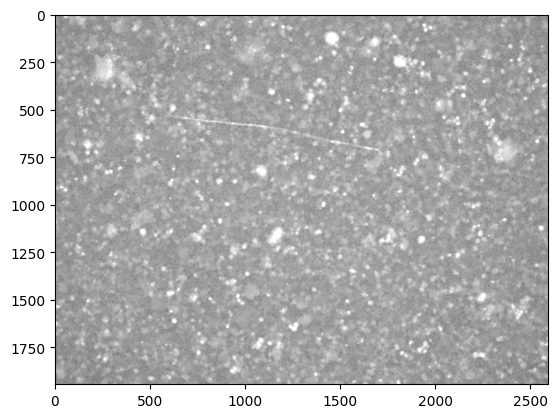

In [85]:
plt.imshow(images[5])

In [86]:
hdr = create_hdr(images, exposure_times)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.22496226..1.0876545].


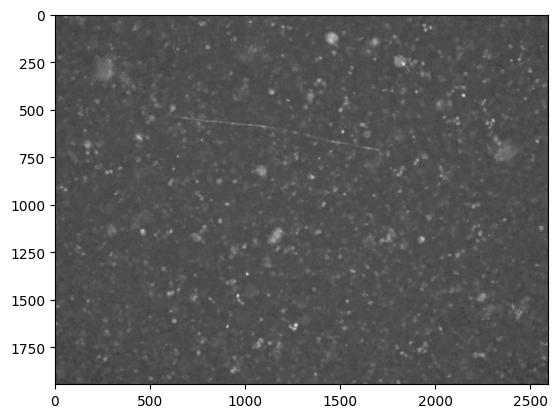

In [87]:
plt.imshow(hdr)

In [89]:
def convert_image_to_pil(im: np.ndarray):
    im = im / im.max()
    im = (255 * im).astype(np.uint8)
    return Image.fromarray(im)

In [90]:
img =  convert_image_to_pil(hdr)

In [91]:
img.save('right_1000_um"_um_3_hdr.png')

In [92]:
for file_name in filenames:
    img = Image.open(parent / file_name)
    img.save(file_name)

In [93]:
filenames = [
    "right_1000_um_3_1_005_fluv5_1.00_1.50.png", 
    "right_1000_um_3_1_006_fluv2_1.00_1.50.png", 
    "right_1000_um_3_1_011_fluvX2_1.00_1.50.png",
    "right_1000_um_3_1_008_fluv_1.00_1.50.png",
]
exposure_times = [1/5, 1/2, 2,1]
images = [cv2.imread(parent / fn) for fn in filenames]

In [94]:
hdr = create_hdr(images, exposure_times)

In [95]:
img =  convert_image_to_pil(hdr)

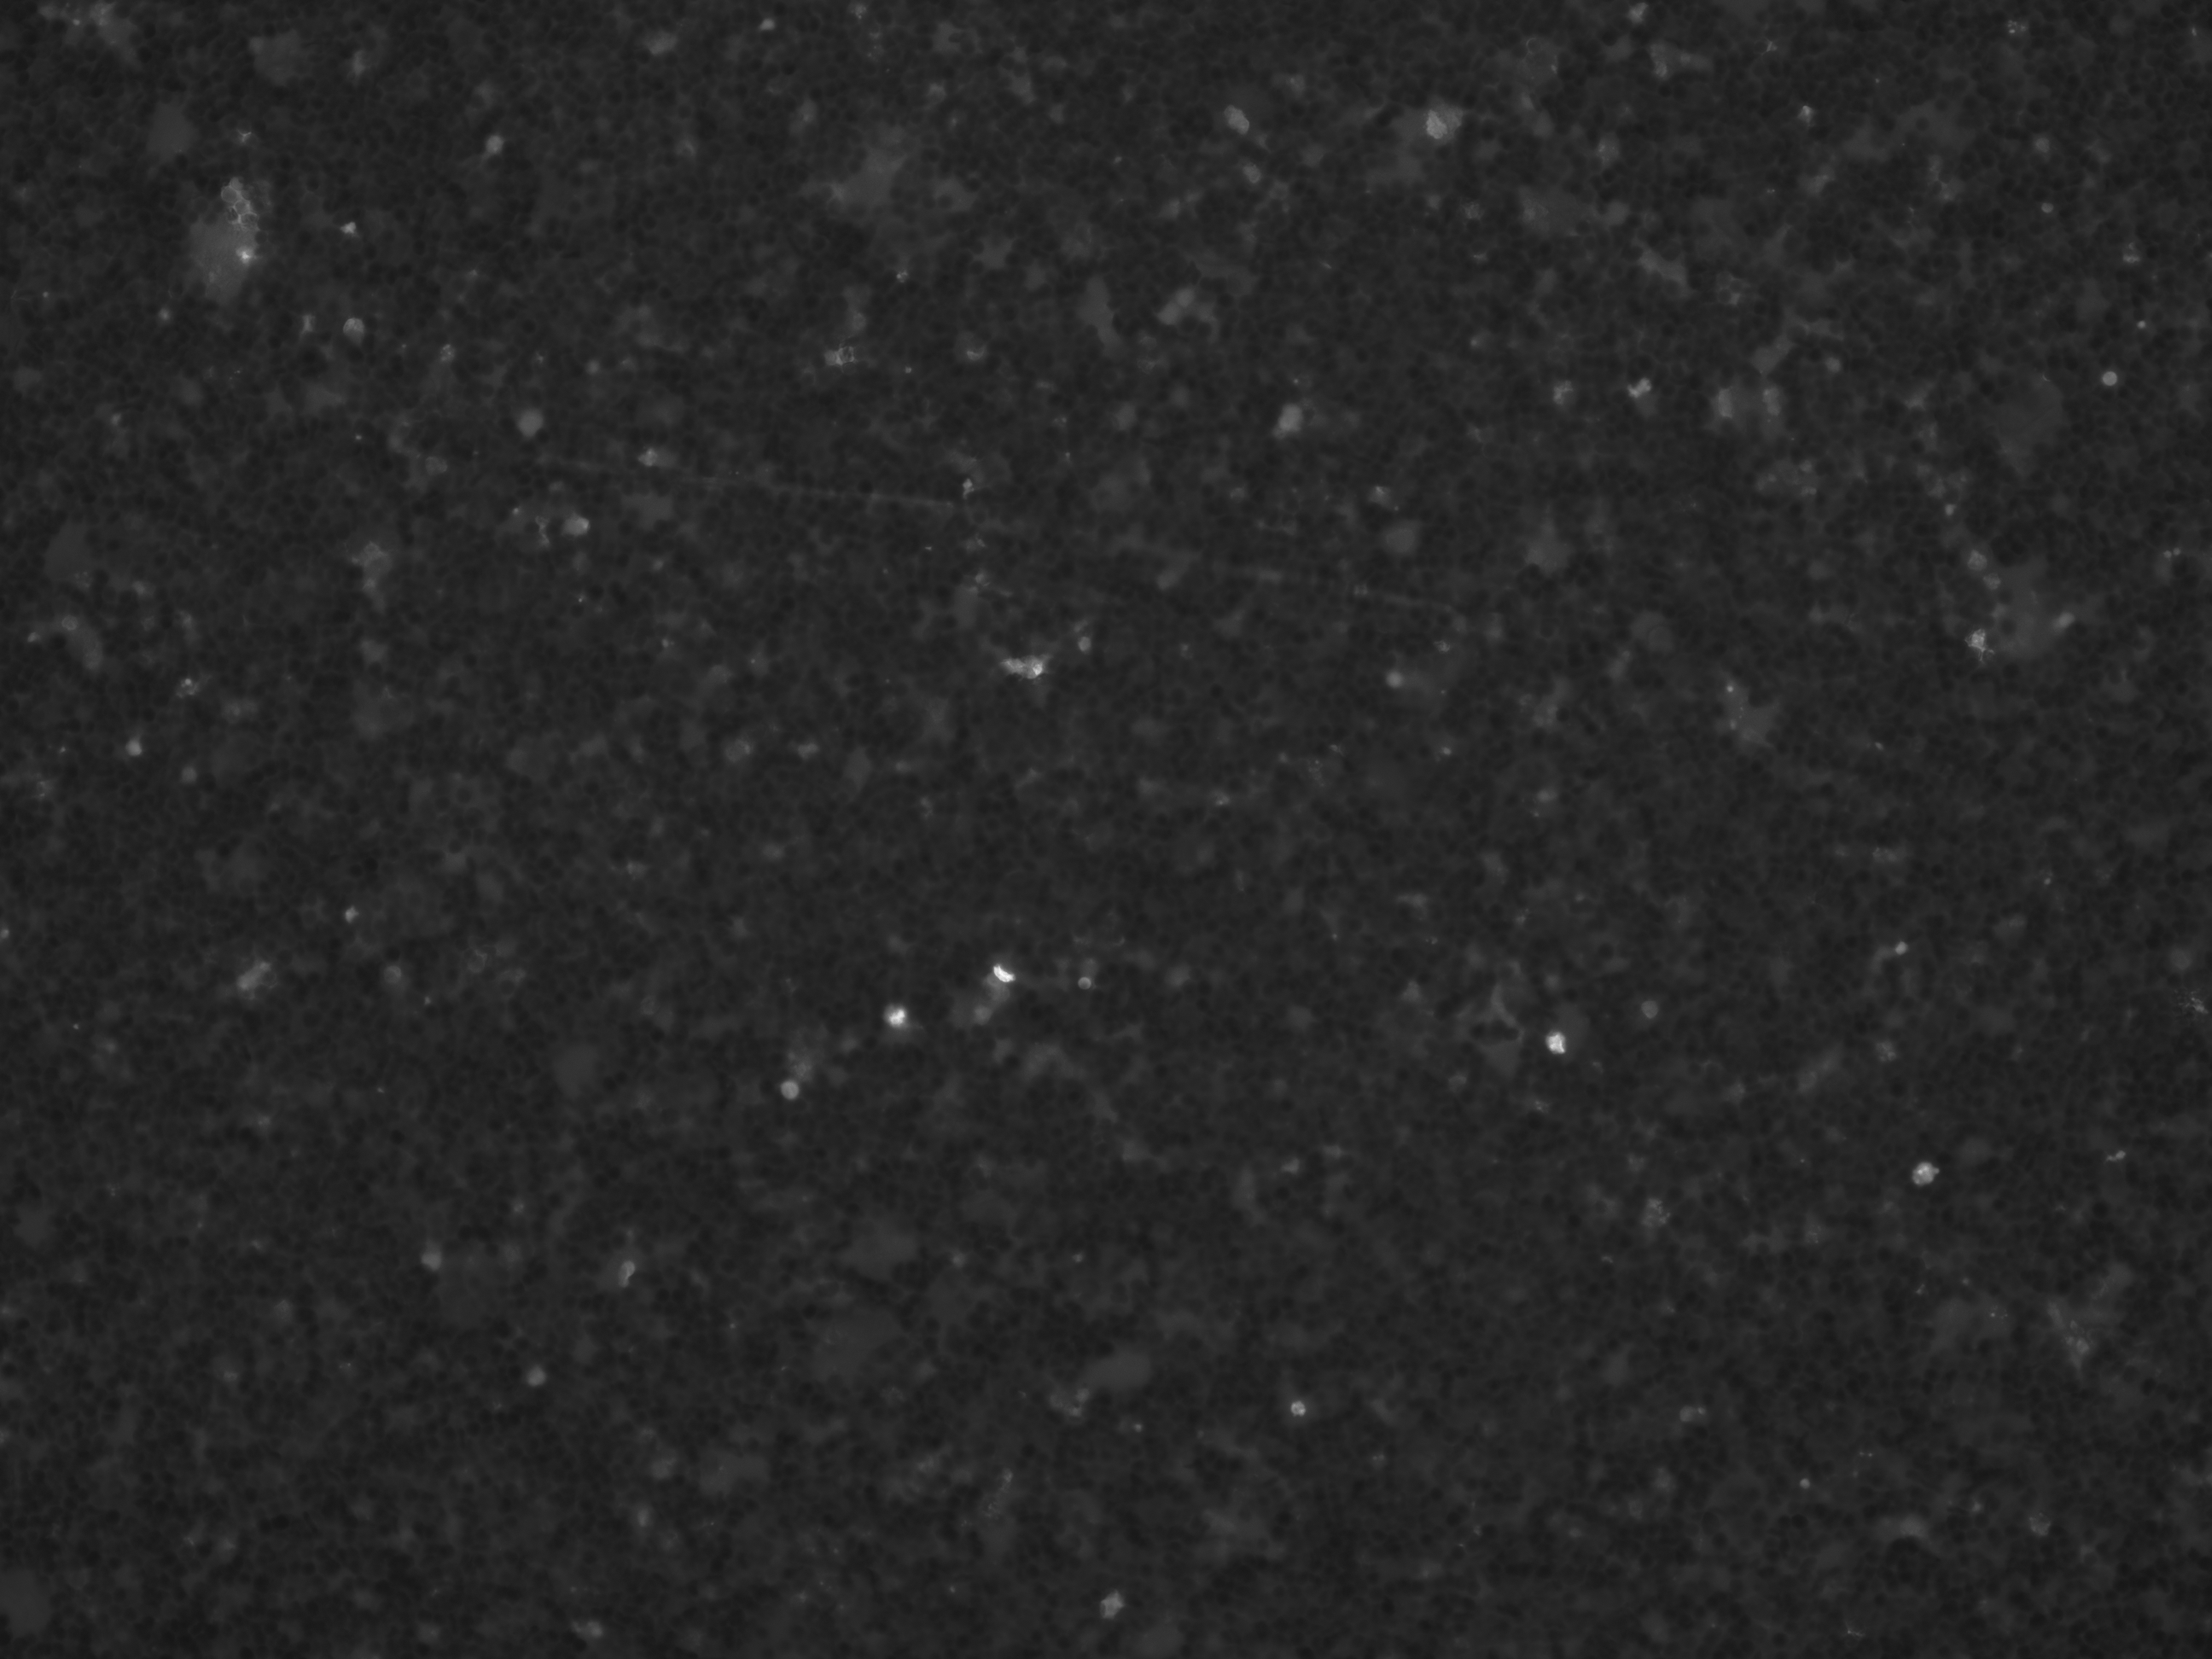

In [96]:
img

In [97]:
img.save("right_1000_um_3_1_hdr.png")

In [98]:
for file_name in filenames:
    img = Image.open(parent / file_name)
    img.save(file_name)